In [ ]:
# Netflix Content Analysis
This project analyzes the Netflix dataset to explore trends in content types, countries, 
genres, and growth over time.


In [2]:
!pip install pandas numpy seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
import pandas as pd

# Load the Netflix dataset (you will upload it next)
df = pd.read_csv('netflix_titles.csv')

# See first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Show number of rows and columns
print("Shape of dataset:", df.shape)

# Show column names and data types
df.info()

# Show quick stats (for numerical columns)
df.describe(include='all').T


Shape of dataset: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Count how many missing values each column has
df.isnull().sum()

# Fill missing director names with "Unknown"
df['director'].fillna('Unknown', inplace=True)

# Fill missing country with "Unknown"
df['country'].fillna('Unknown', inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check again if any missing values left
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast            825
country           0
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

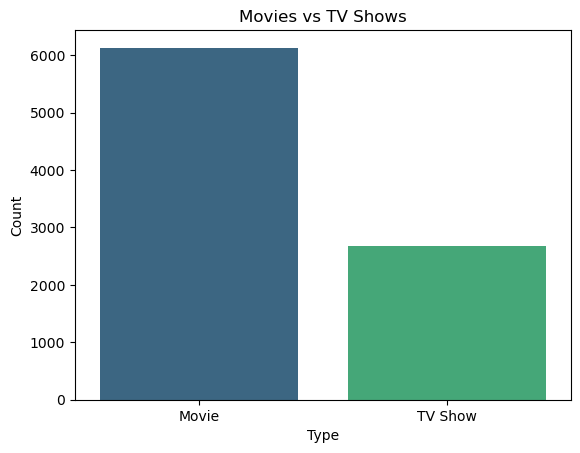

In [8]:
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


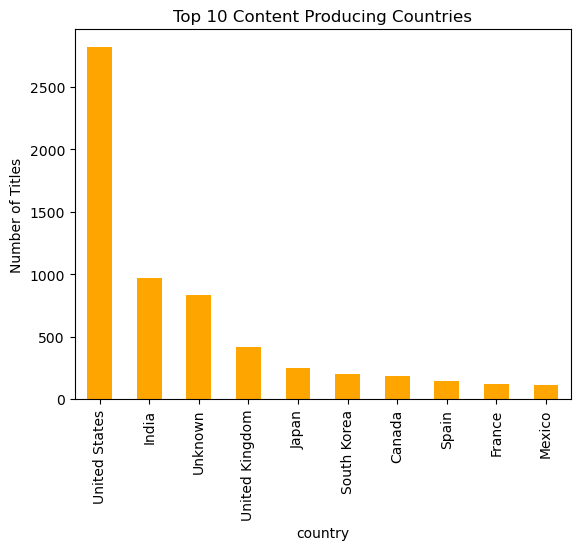

In [9]:
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Content Producing Countries')
plt.ylabel('Number of Titles')
plt.show()



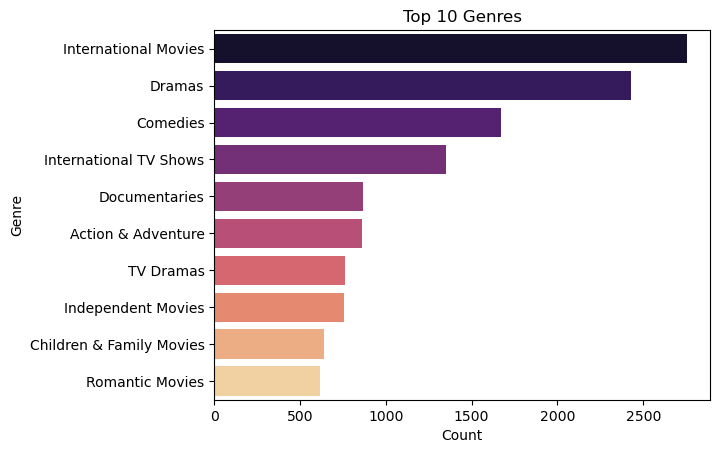

In [10]:
# The 'listed_in' column contains genres
from collections import Counter

all_genres = ','.join(df['listed_in']).split(',')
top_genres = Counter([g.strip() for g in all_genres]).most_common(10)

genres_df = pd.DataFrame(top_genres, columns=['Genre','Count'])
sns.barplot(x='Count', y='Genre', data=genres_df, palette='magma')
plt.title('Top 10 Genres')
plt.show()


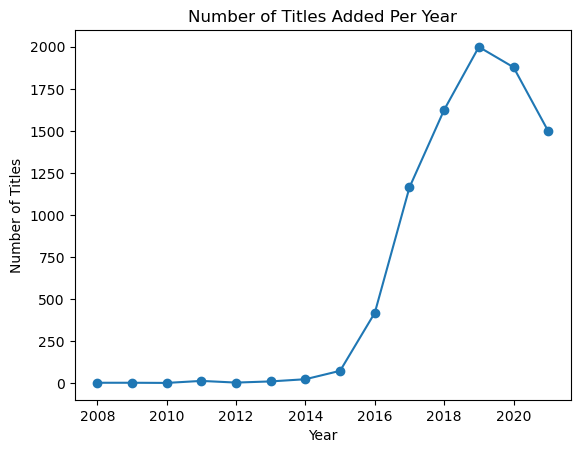

In [12]:
# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract only the year
df['year_added'] = df['date_added'].dt.year

# Plot number of titles per year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


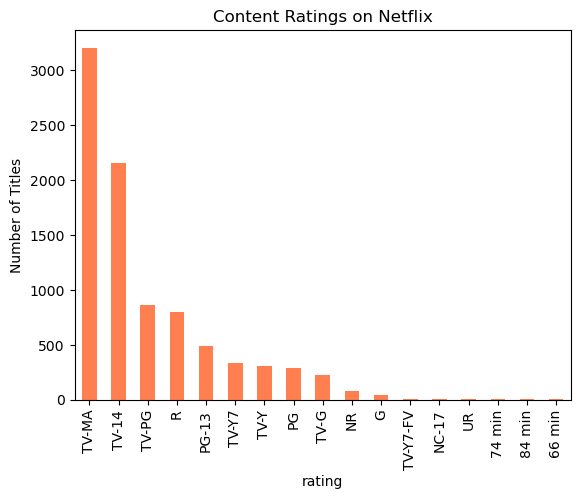

In [6]:
df['rating'].value_counts().plot(kind='bar', color='coral')
plt.title('Content Ratings on Netflix')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
# Key Insights
- Movies make up 70% of all content.
- The US and India are the largest content producers.
- Number of titles grew rapidly from 2015 to 2020.
- Top genres are Dramas, Comedies, and Documentaries.
